Plots Psi,alpha, and p0. Where alpha and p0 are approximately what was in the article. Loops through user inputted fields and temperature arrays.

In [3]:
import numpy as np
from scipy.integrate import quad, dblquad
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
thetamin = 17.8*np.pi/180
thetamax = 33.4*np.pi/180
t = 4*10**-6 #Cell Thickness

tempsK = np.array([323,325,327,329,331]) #Kelvin
fields = np.array([5,15,25,35,45,55,65,75,85,95]) #This is E field (V/um)

In [5]:
def Boltz(theta,phi):
    return np.exp((1/T)*p0k*E*np.sin(theta)*np.cos(phi)*(1+alpha*E*np.cos(phi)))*np.sin(theta)

In [6]:
def psi_fun(theta,phi):
    numerator = np.sin(2*theta)*np.cos(phi)
    denominator = np.cos(theta)**2 - np.sin(theta)**2 * np.cos(phi)**2
    boltz = np.exp((1/T)*p0k*E*np.sin(theta)*np.cos(phi)*(1+alpha*E*np.cos(phi)))
    return numerator*boltz*np.sin(theta)/denominator

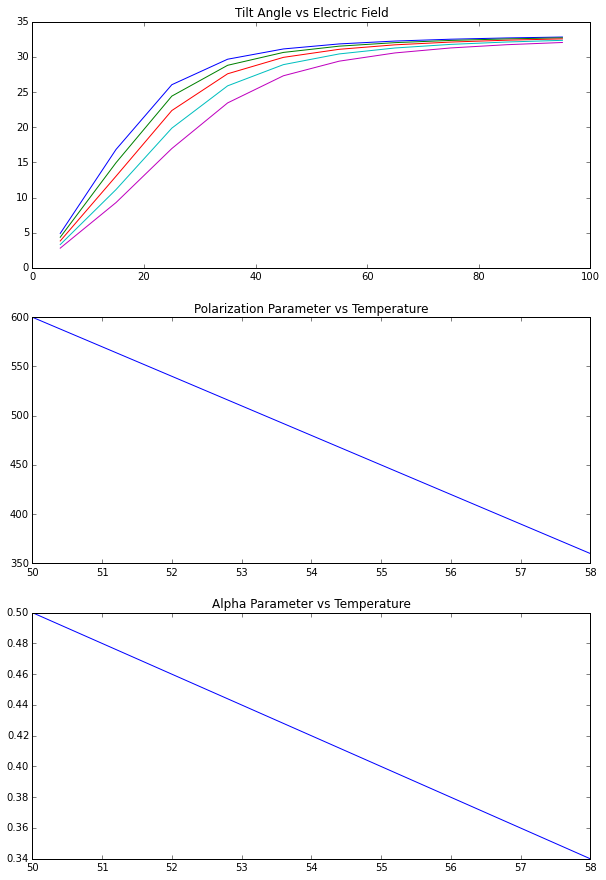

In [7]:
p0k = 600*3.33e-30/1.38e-23
alpha = .5e-6

Np0 = np.array([])
Nalpha = np.array([])
tempC = np.array([])
volts = np.array([])
Psi = np.zeros((len(tempsK),len(fields)))

fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(10,15));
plt.sca(ax1);

j=0

for entry in tempsK: #Initiate loop over temperatures
    T = entry
    i=0
    
    for val in fields: #Now loop over applied E fields
        E = val/t
        
        tan2psi,tan2psi_error = dblquad(psi_fun,0, 2*np.pi,lambda theta: thetamin, lambda theta: thetamax)
        Z,Z_error = dblquad(Boltz,0, 2*np.pi,lambda theta: thetamin, lambda theta: thetamax)
        psi = np.arctan(tan2psi/Z)/2*180/np.pi
        Psi[j,i] = psi
        
        i=i+1
    plt.plot(fields,Psi[j,:]);
    j=j+1
    
    Np0 = np.append(Np0,p0k/3.33e-30 *1.38e-23)
    Nalpha = np.append(Nalpha,alpha*1e6)
    tempC = np.append(tempC,T-273)
    
    alpha = alpha - 4e-8  # Decrease parameter alpha in imitiation of real data
    p0k = p0k - 60*3.33e-30/1.38e-23  # Decrease polarization
    
    

plt.title('Tilt Angle vs Electric Field');

    
plt.sca(ax2);
plt.plot(tempC,Np0);
plt.title('Polarization Parameter vs Temperature');

plt.sca(ax3);
plt.plot(tempC,Nalpha);
plt.title('Alpha Parameter vs Temperature');

In [8]:
Psi #Array where [0,:] Is all the Psi values at the first temperature. [1,:] would be psi at second temperature]

array([[  4.9056387 ,  16.85256143,  26.0563618 ,  29.6809293 ,
         31.14129687,  31.85484219,  32.26360885,  32.52501654,
         32.70447992,  32.83371617],
       [  4.36543608,  14.96461593,  24.4347061 ,  28.81634912,
         30.64663329,  31.53674634,  32.03723313,  32.35241811,
         32.5670272 ,  32.72108479],
       [  3.83824556,  13.0476484 ,  22.38363913,  27.60942263,
         29.94536843,  31.0913264 ,  31.72702749,  32.11979898,
         32.38350725,  32.57133106],
       [  3.32338494,  11.14705827,  19.87888262,  25.89558141,
         28.91149715,  30.43334503,  31.27691778,  31.78946437,
         32.1271145 ,  32.36419003],
       [  2.82012161,   9.30033415,  16.97889193,  23.46758493,
         27.32828085,  29.40393733,  30.57545143,  31.28449979,
         31.74367329,  32.05985549]])

In [9]:
Psi[0,:] #Psi when T = 323. Across all electric fields.

array([  4.9056387 ,  16.85256143,  26.0563618 ,  29.6809293 ,
        31.14129687,  31.85484219,  32.26360885,  32.52501654,
        32.70447992,  32.83371617])

In [13]:
Psi[1,:] #Psi when T = 325. Across all electric fields.

array([  4.36543608,  14.96461593,  24.4347061 ,  28.81634912,
        30.64663329,  31.53674634,  32.03723313,  32.35241811,
        32.5670272 ,  32.72108479])

In [14]:
parameters = [alpha-4e-8,600*3.33e-30-60*3.33e-30]

In [15]:
parameters

[4.6e-07, 1.7982e-27]

In [10]:
E=5/t
p0k = 600*3.33e-30/1.38e-23
alpha = .5e-6


tan2psi,tan2psi_error = dblquad(psi_fun,0, 2*np.pi,lambda theta: thetamin, lambda theta: thetamax)
Z,Z_error = dblquad(Boltz,0, 2*np.pi,lambda theta: thetamin, lambda theta: thetamax)
psi = np.arctan(tan2psi/Z)/2*180/np.pi

In [11]:
psi

4.7853805476616245